# TASK 1. DIFFERENT KEY LENGTH

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare DataFrame

In [144]:
texts=['text'+str(i) for i in range(1,11)]
key_words=['sun','heat','beast','thinks','predict','payloads','character','unscramble']
iterables = [texts,key_words]
indx=pd.MultiIndex.from_product(iterables, names=['text', 'key'])

In [152]:
df=pd.DataFrame(index=indx, columns=['pred_key','#words','#enc_words','#dec_words','top1','top1_prob','top2','top2_prob','top3','top3_prob'])

In [153]:
df

pred_key #words #enc_words #dec_words top1 top1_prob top2  \
text   key                                                                    
text1  sun             NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       heat            NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       beast           NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       thinks          NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       predict         NaN    NaN        NaN        NaN  NaN       NaN  NaN   
...                    ...    ...        ...        ...  ...       ...  ...   
text10 thinks          NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       predict         NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       payloads        NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       character       NaN    NaN        NaN        NaN  NaN       NaN  NaN   
       unscramble      NaN    NaN        NaN        NaN  NaN       NaN  NaN   

                  top2_prob top3 top3_prob  
text   key                                  
text1  sun              NaN  NaN       NaN  
       heat             NaN  NaN       NaN  
       beast            NaN  NaN       NaN  
       thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
...                     ...  ...       ...  
text10 thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
       payloads         NaN  NaN       NaN  
       character        NaN  NaN       NaN  
       unscramble       NaN  NaN       NaN  

[80 rows x 10 columns]

# Explore data

In [146]:
!ls data1

text1       text1_enc4  text3_dec7  text5_dec2  text6_enc6  text8_enc1
text10      text1_enc5  text3_dec8  text5_dec3  text6_enc7  text8_enc2
text10_dec1 text1_enc6  text3_enc1  text5_dec4  text6_enc8  text8_enc3
text10_dec2 text1_enc7  text3_enc2  text5_dec5  text7       text8_enc4
text10_dec3 text1_enc8  text3_enc3  text5_dec6  text7_dec1  text8_enc5
text10_dec4 text2       text3_enc4  text5_dec7  text7_dec2  text8_enc6
text10_dec5 text2_dec1  text3_enc5  text5_dec8  text7_dec3  text8_enc7
text10_dec6 text2_dec2  text3_enc6  text5_enc1  text7_dec4  text8_enc8
text10_dec7 text2_dec3  text3_enc7  text5_enc2  text7_dec5  text9
text10_dec8 text2_dec4  text3_enc8  text5_enc3  text7_dec6  text9_dec1
text10_enc1 text2_dec5  text4       text5_enc4  text7_dec7  text9_dec2
text10_enc2 text2_dec6  text4_dec1  text5_enc5  text7_dec8  text9_dec3
text10_enc3 text2_dec7  text4_dec2  text5_enc6  text7_enc1  text9_dec4
text10_enc4 text2_dec8  text4_dec3  text5_enc7  text7_enc2  text9_dec5
text10_enc5

In [147]:
!cat data1/text1

Within two minutes or even less he had forgotten all his troubles Not because his troubles were one whit less heavy and bitter to him than a mans are to a man but because a new and powerful interest bore them down and drove them out of his mind for the timejust as mens misfortunes are forgotten in the excitement of new enterprises This new interest was a valued novelty in whistling which he had just acquired from a negro and he was suffering to practise it undisturbed It consisted in a peculiar birdlike turn a sort of liquid warble produced by touching the tongue to the roof of the mouth at short intervals in the midst of the musicthe reader probably remembers how to do it if he has ever been a boy Diligence and attention soon gave him the knack of it and he strode down the street with his mouth full of harmony and his soul full of gratitude He felt much as an astronomer feels who has discovered a new planetno doubt as far as strong deep unalloyed pleasure is concerned the advantage wa

In [154]:
text_lens=[]
for i in range(1,11):
    lst = !wc -w data1/text{i}
    df.loc['text'+str(i),'#words']=lst[0].split(' ')[5]  
df['#words'].unique()

array(['205', '191', '193', '201', '195', '199', '215', '194', '203'],
      dtype=object)

# Encrypt texts with different key words

In [88]:
for i in range(1,len(texts)+1):
    for j in range(0,len(key_words)):
        !./encrypt.sh {key_words[j]} data1/text{i} > data1/text{i}_enc{j+1}

In [149]:
!cat data1/text1_enc2

dmtapr tpv qigbxel vv eolr lxzw hx oed yvvghaxeg hpl apw tkvybelw nha fevhysx oms mysuusis plve hui wapx lxzw hxhzy tuh bbaxek as hbt xhtu e mtuw akl xo t ten ubx bxjeull e nxd enw wswxyjue prtxyism isrx alef kswg hrd wysvx alef vyt hm lil tmnw msr moi tbtijnzx al tinl tmsyvvtnuis tyi fhykomain bu xhx lbcbaimxux oy uiw xuxekwvillw tapw nxd mnmlvela aal h zaebid gvzeeac ig dlilapign ahbjl hx oed cbwt tjuubyid yysm t uigkv enw oi wtz wuymirbuk th wvavamsx px ugkmsmbvbxk mt vvrsbzxew pr a ilgueper upvdepoe mbvn t zsrm vj lbxyiw derusi pkvhuvlh br asuvomnz ale mvrgnl xo moi rhvj oy ale fvyta hx savvt buxekcell pr tal qiwzx oy ale fbwivale kledxy trhiebef veflqbxyw hhd xo wv mt bm le ahw eolv bxlr a uvc dbsmgxuge tuh amainmpsn lvsn zhze apq tal ontjo oy px agk le lavowl hopu xhx zxrxlx wbal hbz qonal fnsp oy oerfvry tuh hbz wons jues sf zyetbaydx oi fxsx mnjl al hr alavogvqek mieez ahh oes wpwchcirxk e nxd tltuitgv honix al mer tz wtkvrg wlip nuelevcew wpetzyrx pw chugekuid moi awcenmhke ph

In [155]:
text_lens=[]
for i in range(1,len(texts)+1):
    for key in key_words:
        lst = !wc -w data1/text{i}_enc{j}
        df.loc['text'+str(i),key]['#enc_words']=lst[0].split(' ')[5]  

In [156]:
df

pred_key #words #enc_words #dec_words top1 top1_prob top2  \
text   key                                                                    
text1  sun             NaN    205        205        NaN  NaN       NaN  NaN   
       heat            NaN    205        205        NaN  NaN       NaN  NaN   
       beast           NaN    205        205        NaN  NaN       NaN  NaN   
       thinks          NaN    205        205        NaN  NaN       NaN  NaN   
       predict         NaN    205        205        NaN  NaN       NaN  NaN   
...                    ...    ...        ...        ...  ...       ...  ...   
text10 thinks          NaN    201        201        NaN  NaN       NaN  NaN   
       predict         NaN    201        201        NaN  NaN       NaN  NaN   
       payloads        NaN    201        201        NaN  NaN       NaN  NaN   
       character       NaN    201        201        NaN  NaN       NaN  NaN   
       unscramble      NaN    201        201        NaN  NaN       NaN  NaN   

                  top2_prob top3 top3_prob  
text   key                                  
text1  sun              NaN  NaN       NaN  
       heat             NaN  NaN       NaN  
       beast            NaN  NaN       NaN  
       thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
...                     ...  ...       ...  
text10 thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
       payloads         NaN  NaN       NaN  
       character        NaN  NaN       NaN  
       unscramble       NaN  NaN       NaN  

[80 rows x 10 columns]

# Decrypt texts 

In [96]:
for i in range(1,len(texts)+1):
    for j in range(0,len(key_words)):
        !./decrypt.sh {key_words[j]} data1/text{i}_enc{j+1} > data1/text{i}_dec{j+1}

In [99]:
!cat data1/text1_dec8

within two minutes or even less he had forgotten all his troubles not because his troubles were one whit less heavy and bitter to him than a mans are to a man but because a new and powerful interest bore them down and drove them out of his mind for the timejust as mens misfortunes are forgotten in the excitement of new enterprises this new interest was a valued novelty in whistling which he had just acquired from a negro and he was suffering to practise it undisturbed it consisted in a peculiar birdlike turn a sort of liquid warble produced by touching the tongue to the roof of the mouth at short intervals in the midst of the musicthe reader probably remembers how to do it if he has ever been a boy diligence and attention soon gave him the knack of it and he strode down the street with his mouth full of harmony and his soul full of gratitude he felt much as an astronomer feels who has discovered a new planetno doubt as far as strong deep unalloyed pleasure is concerned the advantage wa

In [157]:
text_lens=[]
for i in range(1,len(texts)+1):
    for key in key_words:
        lst = !wc -w data1/text{i}_dec{j}
        df.loc['text'+str(i),key]['#dec_words']=lst[0].split(' ')[5]  

In [158]:
df

pred_key #words #enc_words #dec_words top1 top1_prob top2  \
text   key                                                                    
text1  sun             NaN    205        205        205  NaN       NaN  NaN   
       heat            NaN    205        205        205  NaN       NaN  NaN   
       beast           NaN    205        205        205  NaN       NaN  NaN   
       thinks          NaN    205        205        205  NaN       NaN  NaN   
       predict         NaN    205        205        205  NaN       NaN  NaN   
...                    ...    ...        ...        ...  ...       ...  ...   
text10 thinks          NaN    201        201        201  NaN       NaN  NaN   
       predict         NaN    201        201        201  NaN       NaN  NaN   
       payloads        NaN    201        201        201  NaN       NaN  NaN   
       character       NaN    201        201        201  NaN       NaN  NaN   
       unscramble      NaN    201        201        201  NaN       NaN  NaN   

                  top2_prob top3 top3_prob  
text   key                                  
text1  sun              NaN  NaN       NaN  
       heat             NaN  NaN       NaN  
       beast            NaN  NaN       NaN  
       thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
...                     ...  ...       ...  
text10 thinks           NaN  NaN       NaN  
       predict          NaN  NaN       NaN  
       payloads         NaN  NaN       NaN  
       character        NaN  NaN       NaN  
       unscramble       NaN  NaN       NaN  

[80 rows x 10 columns]

# Analyze texts and predict possible key word length

### Analyze with bigrams

In [159]:
df_bi=df.copy()

In [160]:
for i in range (1,len(texts)+1):
    for j in range(0,len(key_words)):
        res_lst=!python3 kasiski_analyze.py data1/text{i}_enc{j+1} 2
        for k in range(1,4):
            df_bi.loc['text'+str(i),key_words[j]]['top'+str(k)]=res_lst[k-1].split(': ')[0]
            df_bi.loc['text'+str(i),key_words[j]]['top'+str(k)+'_prob']=res_lst[k-1].split(': ')[1]

In [161]:
df_bi

pred_key #words #enc_words #dec_words top1  \
text   key                                                     
text1  sun             NaN    205        205        205    3   
       heat            NaN    205        205        205    4   
       beast           NaN    205        205        205    5   
       thinks          NaN    205        205        205    6   
       predict         NaN    205        205        205    7   
...                    ...    ...        ...        ...  ...   
text10 thinks          NaN    201        201        201    6   
       predict         NaN    201        201        201    7   
       payloads        NaN    201        201        201    2   
       character       NaN    201        201        201    9   
       unscramble      NaN    201        201        201    2   

                            top1_prob top2           top2_prob top3  \
text   key                                                            
text1  sun          48.30508474576271    6    16.3135593220339    2   
       heat         38.63080684596577    2  25.183374083129586    3   
       beast        36.84210526315789    2  19.924812030075188   10   
       thinks       34.26294820717131    2  28.286852589641438    3   
       predict      39.56043956043956    3  15.934065934065933    2   
...                               ...  ...                 ...  ...   
text10 thinks       36.22047244094488    2  15.748031496062993    3   
       predict     28.723404255319153    2   25.53191489361702   14   
       payloads     21.31979695431472    8   21.31979695431472    4   
       character    27.73722627737226    2   27.00729927007299    3   
       unscramble  45.108695652173914   10  13.586956521739129    4   

                            top3_prob  
text   key                             
text1  sun          10.38135593220339  
       heat        10.757946210268948  
       beast       11.654135338345863  
       thinks      10.358565737051793  
       predict     10.989010989010989  
...                               ...  
text10 thinks       9.448818897637794  
       predict     10.106382978723403  
       payloads    13.705583756345177  
       character     14.5985401459854  
       unscramble  13.043478260869565  

[80 rows x 10 columns]

# Try to decrypt encrypted text by top1

In [162]:
for i in range(1,len(texts)+1):
    for j in range(0,len(key_words)):
        pred_key=!python3 kasiski_attack.py data1/text{i}_enc{j+1} {df_bi.loc['text'+str(i),key_words[j]]['top1']}
        df_bi.loc['text'+str(i),key_words[j]]['pred_key']=pred_key[0]

In [163]:
df_bi

pred_key #words #enc_words #dec_words top1  \
text   key                                                       
text1  sun               sun    205        205        205    3   
       heat             heat    205        205        205    4   
       beast           beast    205        205        205    5   
       thinks         thinks    205        205        205    6   
       predict       predict    205        205        205    7   
...                      ...    ...        ...        ...  ...   
text10 thinks         thinks    201        201        201    6   
       predict       predict    201        201        201    7   
       payloads           oa    201        201        201    2   
       character   character    201        201        201    9   
       unscramble         sb    201        201        201    2   

                            top1_prob top2           top2_prob top3  \
text   key                                                            
text1  sun          48.30508474576271    6    16.3135593220339    2   
       heat         38.63080684596577    2  25.183374083129586    3   
       beast        36.84210526315789    2  19.924812030075188   10   
       thinks       34.26294820717131    2  28.286852589641438    3   
       predict      39.56043956043956    3  15.934065934065933    2   
...                               ...  ...                 ...  ...   
text10 thinks       36.22047244094488    2  15.748031496062993    3   
       predict     28.723404255319153    2   25.53191489361702   14   
       payloads     21.31979695431472    8   21.31979695431472    4   
       character    27.73722627737226    2   27.00729927007299    3   
       unscramble  45.108695652173914   10  13.586956521739129    4   

                            top3_prob  
text   key                             
text1  sun          10.38135593220339  
       heat        10.757946210268948  
       beast       11.654135338345863  
       thinks      10.358565737051793  
       predict     10.989010989010989  
...                               ...  
text10 thinks       9.448818897637794  
       predict     10.106382978723403  
       payloads    13.705583756345177  
       character     14.5985401459854  
       unscramble  13.043478260869565  

[80 rows x 10 columns]

# Analyze results

In [238]:
corr_pred_keys_bi=[0 for j in range(0,len(key_words))]
for i in range(0,len(key_words)):
    for text in texts:
        if(df_bi.loc[text,key_words[i]]['pred_key']==key_words[i]):
            corr_pred_keys_bi[i]+=1

In [239]:
corr_pred_keys_bi

[10, 9, 10, 9, 10, 3, 7, 2]

<BarContainer object of 8 artists>

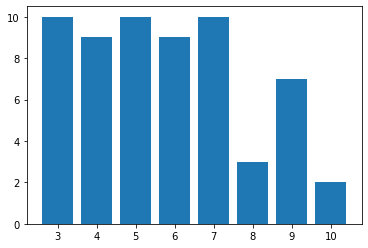

In [240]:
plt.bar([len(key) for key in key_words],corr_pred_keys_bi)

### Analyze with trigrams

In [210]:
df_tri=df.copy()

In [211]:
for i in range (1,len(texts)+1):
    for j in range(0,len(key_words)):
        res_lst=!python3 kasiski_analyze.py data1/text{i}_enc{j+1} 3
        for k in range(1,4):
            if(len(res_lst)!=0 and k<len(res_lst)+1):
                if(len(res_lst[k-1])!=0):
                    df_tri.loc['text'+str(i),key_words[j]]['top'+str(k)]=res_lst[k-1].split(': ')[0]
                    df_tri.loc['text'+str(i),key_words[j]]['top'+str(k)+'_prob']=res_lst[k-1].split(': ')[1]
            else:
                df_tri.loc['text'+str(i),key_words[j]]['top'+str(k)]=np.NaN
                df_tri.loc['text'+str(i),key_words[j]]['top'+str(k)+'_prob']=np.NaN

In [213]:
df_tri.loc['text1']

,pred_key,#words,#enc_words,#dec_words,top1,top1_prob,top2,top2_prob,top3,top3_prob
key,,,,,,,,,,
sun,NaN,205,205,205,3,63.1578947368421,9,14.035087719298245,6,8.771929824561402
heat,NaN,205,205,205,4,68.75,8,12.5,2,9.375
beast,NaN,205,205,205,5,69.23076923076923,10,15.384615384615385,33,7.6923076923076925
thinks,NaN,205,205,205,6,78.57142857142857,12,14.285714285714285,18,7.142857142857142
predict,NaN,205,205,205,7,75.0,3,12.5,28,6.25
payloads,NaN,205,205,205,8,85.71428571428571,16,14.285714285714285,NaN,NaN
character,NaN,205,205,205,9,88.88888888888889,18,11.11111111111111,NaN,NaN
unscramble,NaN,205,205,205,10,50.0,2,50.0,NaN,NaN


In [214]:
# cols_to_leave=['pred_key','top1','top1_prob','top2','top2_prob']
# df_tri_clear=df_tri[cols_to_leave]
# df_tri_clear

# Try to decrypt encrypted text by top1

In [218]:
for i in range(1,len(texts)+1):
    for j in range(0,len(key_words)):
        pred_key=!python3 kasiski_attack.py data1/text{i}_enc{j+1} {df_tri.loc['text'+str(i),key_words[j]]['top1']}
        df_tri.loc['text'+str(i),key_words[j]]['pred_key']=pred_key[0]

In [232]:
df_tri

pred_key #words #enc_words #dec_words top1  \
text   key                                                       
text1  sun               sun    205        205        205    3   
       heat             heat    205        205        205    4   
       beast           beast    205        205        205    5   
       thinks         thinks    205        205        205    6   
       predict       predict    205        205        205    7   
...                      ...    ...        ...        ...  ...   
text10 thinks         thinks    201        201        201    6   
       predict       predict    201        201        201    7   
       payloads     payloads    201        201        201    8   
       character   character    201        201        201    9   
       unscramble         sb    201        201        201    2   

                           top1_prob top2           top2_prob top3  \
text   key                                                           
text1  sun          63.1578947368421    9  14.035087719298245    6   
       heat                    68.75    8                12.5    2   
       beast       69.23076923076923   10  15.384615384615385   33   
       thinks      78.57142857142857   12  14.285714285714285   18   
       predict                  75.0    3                12.5   28   
...                              ...  ...                 ...  ...   
text10 thinks      58.06451612903226   12   22.58064516129032   24   
       predict                 68.75   21                12.5   14   
       payloads    41.17647058823529   24  35.294117647058826  120   
       character                60.0   18                30.0   27   
       unscramble  52.94117647058824   10  29.411764705882355    4   

                            top3_prob  
text   key                             
text1  sun          8.771929824561402  
       heat                     9.375  
       beast       7.6923076923076925  
       thinks       7.142857142857142  
       predict                   6.25  
...                               ...  
text10 thinks      12.903225806451612  
       predict                   12.5  
       payloads     11.76470588235294  
       character                 10.0  
       unscramble   11.76470588235294  

[80 rows x 10 columns]

# Analyze results

In [235]:
corr_pred_keys_tri=[0 for j in range(0,len(key_words))]
for i in range(0,len(key_words)):
    for text in texts:
        if(df_tri.loc[text,key_words[i]]['pred_key']==key_words[i]):
            corr_pred_keys_tri[i]+=1

In [236]:
corr_pred_keys_tri

[10, 10, 9, 10, 10, 8, 9, 6]

<BarContainer object of 8 artists>

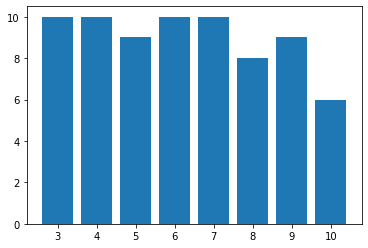

In [241]:
plt.bar([len(key) for key in key_words],corr_pred_keys_tri)

# Compare two results 

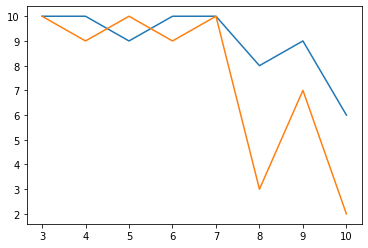

In [248]:
plt.plot([len(key) for key in key_words],corr_pred_keys_tri)
plt.plot([len(key) for key in key_words],corr_pred_keys_bi)